In [34]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm  import SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")

In [35]:
# loading dataset
df=pd.read_csv('heart.csv')

In [36]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 1. EDA

In [37]:
# Checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values are present.

In [38]:
# Checking nan values.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

For EDA purposes we convert the following values into respective columns in the copy of DataFrame.

In [39]:
df1=df.copy()

In [40]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The following values changes for EDA purposes.

    For sex, we will change 1 to ‘Male’ and 0 to ‘Female’.
    For cp (chest pain), we will change:
        1 to ‘typical_ang’
        2 to ‘atypical_ang’
        3 to ‘non_anginal_pain’
        4 to ‘asymptomatic’
    fbs (fasting blood sugar):
        1 to ‘True’
        0 to ‘False’
    restecg:
        0 to ‘normal’
        1 to ‘st_abnormality’
        2 to ‘prob_lvh’
    exang (Exercise induced angina):
        1 to ‘yes’
        0 to ‘no’
    slope: The slope of the peak exercise ST segment
        1 to ‘upsloping’
        2 to ‘flat’
        3 to ‘downsloping’
    thal: Thalium heart scan
        3 to ‘normal’
        6 to ‘fixed_def’
        7 to ‘rev_def’
    target: 1 to ‘yes’, 0 to ‘no’

In [41]:
    df1['sex'] = df1.sex.replace([1,0], ['male', 'female'])
    df1['cp'] = df1.cp.replace([0,1,2,3,4], ['no_cp','typical_ang', 'atypical_ang', 'non_anginal_pain', 'asymptomatic'])
    df1['fbs'] = df1.fbs.replace([1,0], ['true', 'false'])
    df1['restecg'] = df1.restecg.replace([0,1,2], ['normal', 'st_abnormality', 'prob_lvh'])
    df1['exang'] = df1.exang.replace([0,1], ['no', 'yes'])
    df1['slope'] = df1.slope.replace([0,1,2,3], ['no_slope','upsloping', 'flat', 'downsloping'])
    df1['thal'] = df1.thal.replace([3,6,7], ['normal', 'fixed_def', 'rev_def'])
    df1['target'] = df1.target.replace([1,0], ['yes', 'no'])
    df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non_anginal_pain,145,233,true,normal,150,no,2.3,no_slope,0,1,yes
1,37,male,atypical_ang,130,250,false,st_abnormality,187,no,3.5,no_slope,0,2,yes
2,41,female,typical_ang,130,204,false,normal,172,no,1.4,flat,0,2,yes
3,56,male,typical_ang,120,236,false,st_abnormality,178,no,0.8,flat,0,2,yes
4,57,female,no_cp,120,354,false,st_abnormality,163,yes,0.6,flat,0,2,yes


### 1.1 Data Visualisation

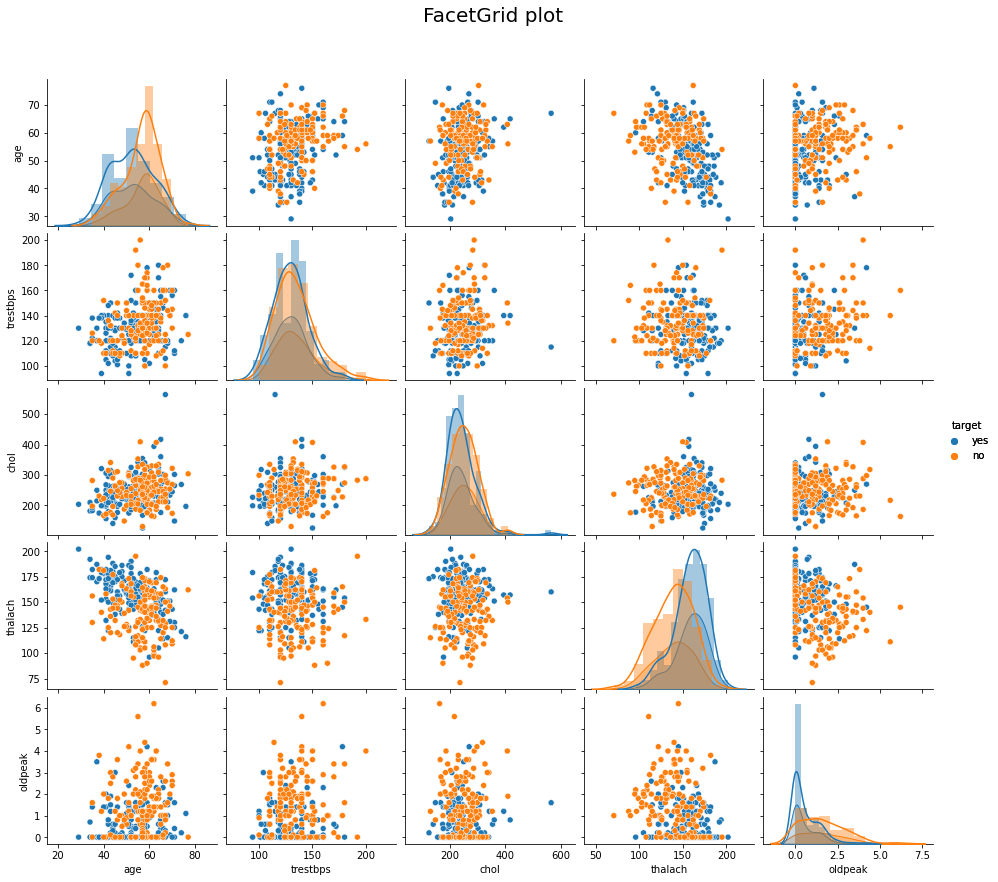

In [42]:
# Pairplot of various columns with target
g = sns.pairplot(df1, vars =['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ], hue = 'target')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

#### Observations:-

1. The heart diseases can be seen evenly in all age group,while healthly patients are more distributed to the right.

In [43]:
# Correlation Matrix
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### Observations:-

1. Close correlation chest pain and target

2. Close correlation slope vs target and thalium.

No handles with labels found to put in legend.


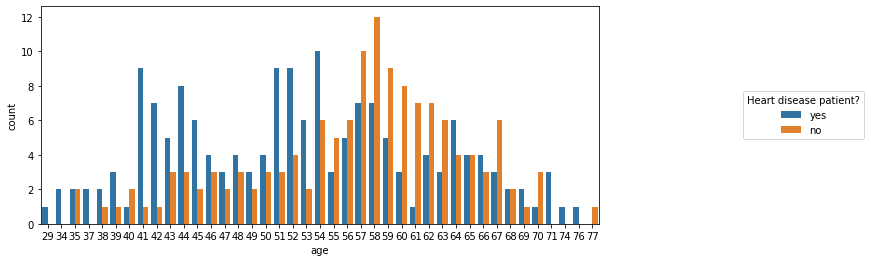

In [44]:
# Age vs target
plt.figure(figsize=(10,4))
plt.legend(loc='upper left')
g = sns.countplot(data = df1, x = 'age', hue = 'target')
g.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

The people after the age of 40 are more affected.

Text(0.5, 1.0, 'Boxplot showing age vs sex')

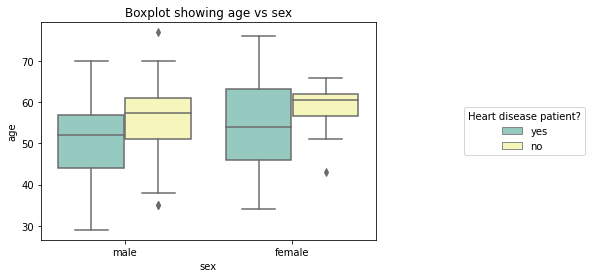

In [45]:
# Sex and target
g1 = sns.boxplot(data = df1, x = 'sex', y = 'age', hue = 'target',palette="Set3")
g1.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g1.set_title('Boxplot showing age vs sex')

In [46]:
# Showing number of heart disease patients based on sex
sex_corr = ['sex', 'target']
sex_corr1 = df1[sex_corr]
sex_corr_y = sex_corr1[sex_corr1['target'] == 'yes'].groupby(['sex']).size().reset_index(name = 'count')
sex_corr_y

,sex,count
0,female,72
1,male,93


In [47]:
# Showing number of healthy patients based on sex 
sex_corr_n = sex_corr1[sex_corr1['target'] == 'no'].groupby(['sex']).size().reset_index(name = 'count')
sex_corr_n

,sex,count
0,female,24
1,male,114


The above data shows that male are more affected.

In [48]:
# Showing number of heart disease patients based on resting ECG results
restecg_corr = ['restecg', 'target']
restecg_corr1 = df1[restecg_corr]
restecg_corr_y = restecg_corr1[restecg_corr1['target'] == 'yes'].groupby(['restecg']).size().reset_index(name = 'count')
restecg_corr_y

,restecg,count
0,normal,68
1,prob_lvh,1
2,st_abnormality,96


In [49]:
# Showing number of heart disease patients based on fasting blood sugar
fbs_corr = ['fbs', 'target']
fbs_corr1 = df1[fbs_corr]
fbs_corr_y = fbs_corr1[fbs_corr1['target'] == 'yes'].groupby(['fbs']).size().reset_index(name = 'count')
fbs_corr_y

,fbs,count
0,false,142
1,true,23


#### Conclusion from EDA.

1. We have tested most of the attributes for correlation and from the results, we can confidently say that both resting ECG results and types of chest pains are correlated to heart disease.

2. Male are more affected.

3. Age more than 40 are more affected.

## 2. Data Processing

After exploring the data set, I observed that I need to scale all the values before training the Machine Learning models. 

In [50]:
# Scaling
scaler = StandardScaler()
df.shape

(303, 14)

In [51]:
X = scaler.fit_transform(df.drop(['target'],axis=1))
y = df.target
X.shape,y.shape

((303, 13), (303,))

## 3. Model Selection

In [52]:
# Splitting into test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [53]:
# Testing different Models
model=[SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for i in model:
    i.fit(X_train,y_train)
    m=i.score(X_test,y_test)
    print(i,m)

SVC() 0.8688524590163934
KNeighborsClassifier() 0.819672131147541
RandomForestClassifier() 0.8360655737704918


SVC() has the best score of 86%. 

In [54]:
# Parameter tunning using grid search CV
params = {'C' : [0.01,0.1,0.25,0.5,0.75,1,10,100],
         'gamma' : [1,0.75,0.5,0.25,0.1,0.01,0.001],
         'kernel': ['rbf','poly','linear']}
gridsearch = GridSearchCV(SVC(),params,refit=True)
gridsearch.fit(X_train,y_train)

gridsearch.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}

In [55]:
#final model for best performance
fmodel = SVC(kernel='linear', gamma=1, C=0.01)
fmodel.fit(X_train,y_train)
fmodel.score(X_test,y_test)

0.8360655737704918

In [56]:
# Confusion Matrix
test_pred = fmodel.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm

array([[19,  8],
       [ 2, 32]])

In [57]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



## Conclusion

The Support Vector Classifier has the best cross score and with the best parameters have the accuracy of 83.6%. 